# **Import and Install Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jovyan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

True

# **Data Load**

In [4]:
data = pd.read_csv('data/chocolate.csv')

In [5]:
data

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75
...,...,...,...,...,...,...,...,...,...,...
1555,336,Bonnat,France,2009,Peru,"Porcelana, Apotequil",75%,"3- B,S,C","flat, bread, earthy",2.75
1556,331,Bonnat,France,2009,Ivory Coast,Ivory Coast,75%,"3- B,S,C","oily, intense cocoa, sl. Burnt",3.00
1557,336,Bonnat,France,2009,Mexico,"Porcelana, Tabasco, Marfil de Blanco",75%,"3- B,S,C","mild bitter, nut, possible mold",3.00
1558,395,Bonnat,France,2009,Mexico,"Xoconusco, cacao Real",75%,"3- B,S,C","fatty, roasty, earthy",3.00


# **Bar Plot for Most 5 frequent words in Most Memorable Characteristics by review interval**

In [6]:
def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 1):
        value = '0-1'
    elif (x>= 1 and x < 2):
        value = '1-2'
    elif (x>= 2 and x < 3):
        value = '2-3'
    elif (x>= 3 and x < 4):
        value = '3-4'
    elif (x >= 4 and x  < 5):
        value = '4-5'
    return value
data['Rating_ranges'] = data['Rating'].apply(rangeScore)

In [7]:
data12 = data[data['Rating_ranges'] == '1-2']['Most Memorable Characteristics']
data45 = data[data['Rating_ranges'] == '4-5']['Most Memorable Characteristics']
data45

46              smooth, wild berries
96        oily, dried fruit, leather
123                         cardamon
146     creamy,sticky, peanut butter
196          balanced, cherry, choco
                    ...             
1504      rich cocoa, spicy, cinamon
1514            creamy, nutty, cocoa
1550           creamy, fatty, floral
1551           creamy, coconut, tang
1554       creamy, strawberry, nutty
Name: Most Memorable Characteristics, Length: 68, dtype: object

In [9]:
data12.to_csv('data/data12.csv')
data45.to_csv('data/data45.csv')

### **Review rating: 1-2**


In [19]:
with open(r'data/data12.csv','r',encoding='cp949') as f:
    text12=f.readlines()
text12

[',Most Memorable Characteristics\n',
 '2,"pastey, bitter, unfixable"\n',
 '21,"vanilla, strong chemical"\n',
 '27,"very nutty, very bitter"\n',
 '39,"sticky, intense, very bitter"\n',
 '59,"acidic, bitter, dry"\n',
 '60,"cardboard, very bitter, floral"\n',
 '66,"bitter, cocoa"\n',
 '73,"chalky, musty, very bitter"\n',
 '79,high intensity bitter\n',
 '80,this is not chocolate\n',
 '1098,"cocoa, dominate off note"\n',
 '1315,"perfume, strong chemical"\n']

In [20]:
text_strip12=list([i.strip() for i in text12 if i !='\n'])
text_join12 =' '.join(text_strip12)
text_join12

',Most Memorable Characteristics 2,"pastey, bitter, unfixable" 21,"vanilla, strong chemical" 27,"very nutty, very bitter" 39,"sticky, intense, very bitter" 59,"acidic, bitter, dry" 60,"cardboard, very bitter, floral" 66,"bitter, cocoa" 73,"chalky, musty, very bitter" 79,high intensity bitter 80,this is not chocolate 1098,"cocoa, dominate off note" 1315,"perfume, strong chemical"'

In [21]:
filtered_content12=re.sub(r'[^\w]',' ', text_join12)
filtered_content12

' Most Memorable Characteristics 2  pastey  bitter  unfixable  21  vanilla  strong chemical  27  very nutty  very bitter  39  sticky  intense  very bitter  59  acidic  bitter  dry  60  cardboard  very bitter  floral  66  bitter  cocoa  73  chalky  musty  very bitter  79 high intensity bitter 80 this is not chocolate 1098  cocoa  dominate off note  1315  perfume  strong chemical '

In [22]:
text12 = nltk.word_tokenize(filtered_content12)
text12

['Most',
 'Memorable',
 'Characteristics',
 '2',
 'pastey',
 'bitter',
 'unfixable',
 '21',
 'vanilla',
 'strong',
 'chemical',
 '27',
 'very',
 'nutty',
 'very',
 'bitter',
 '39',
 'sticky',
 'intense',
 'very',
 'bitter',
 '59',
 'acidic',
 'bitter',
 'dry',
 '60',
 'cardboard',
 'very',
 'bitter',
 'floral',
 '66',
 'bitter',
 'cocoa',
 '73',
 'chalky',
 'musty',
 'very',
 'bitter',
 '79',
 'high',
 'intensity',
 'bitter',
 '80',
 'this',
 'is',
 'not',
 'chocolate',
 '1098',
 'cocoa',
 'dominate',
 'off',
 'note',
 '1315',
 'perfume',
 'strong',
 'chemical']

In [23]:
from collections import Counter
c12= Counter(text12)
print(c12.most_common(30))

[('bitter', 8), ('very', 5), ('strong', 2), ('chemical', 2), ('cocoa', 2), ('Most', 1), ('Memorable', 1), ('Characteristics', 1), ('2', 1), ('pastey', 1), ('unfixable', 1), ('21', 1), ('vanilla', 1), ('27', 1), ('nutty', 1), ('39', 1), ('sticky', 1), ('intense', 1), ('59', 1), ('acidic', 1), ('dry', 1), ('60', 1), ('cardboard', 1), ('floral', 1), ('66', 1), ('73', 1), ('chalky', 1), ('musty', 1), ('79', 1), ('high', 1)]


**Review rating: 4-5**

In [24]:
with open(r'data/data45.csv','r',encoding='cp949') as f:
    text45=f.readlines()

In [25]:
text_strip45=list([i.strip() for i in text45 if i !='\n'])
text_join45=' '.join(text_strip45)

In [26]:
filtered_content45=re.sub(r'[^\w]',' ', text_join45)

In [27]:
text45 = nltk.word_tokenize(filtered_content45)
c45 = Counter(text45)
print(c45.most_common(30))

[('creamy', 26), ('cocoa', 18), ('nutty', 11), ('fruit', 8), ('berry', 6), ('sticky', 5), ('peanut', 5), ('balanced', 5), ('honey', 5), ('complex', 4), ('tart', 4), ('coffee', 4), ('and', 4), ('floral', 4), ('nuts', 4), ('red', 4), ('smooth', 3), ('dried', 3), ('cherry', 3), ('long', 3), ('banana', 3), ('grapes', 3), ('smoke', 3), ('mild', 3), ('strawberry', 3), ('cinamon', 3), ('butter', 2), ('choco', 2), ('marshmallow', 2), ('dark', 2)]


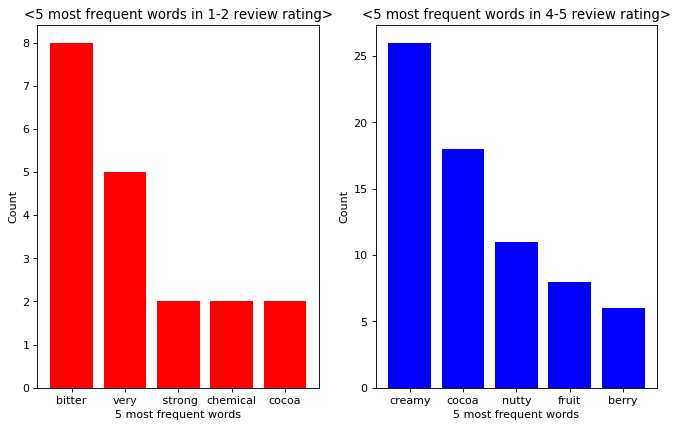

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
x12 = ['bitter', 'very',' strong', 'chemical', 'cocoa']
y12 = [8, 5, 2, 2, 2]
x45 = ['creamy', 'cocoa','nutty','fruit','berry']
y45 = [26, 18, 11, 8, 6]
plt.subplot(1, 2, 1)
plt.bar(x12, y12, color = 'red')
plt.xlabel('5 most frequent words')
plt.ylabel('Count')
plt.title('<5 most frequent words in 1-2 review rating>')
plt.subplot(1, 2, 2)
plt.bar(x45, y45, color = 'blue')
plt.xlabel('5 most frequent words')
plt.ylabel('Count')
plt.title('<5 most frequent words in 4-5 review rating>')
plt.savefig('5 most freqeunt words in 1-2 & 4-5 review rating')

# **Box plot for Cocoa percent by review interval**

In [29]:
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace(r"[^\d]", '').astype(int)

/tmp/ipykernel_308/2372766414.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cocoa Percent'] = data['Cocoa Percent'].str.replace(r"[^\d]", '').astype(int)


In [30]:
data12 = data[data['Rating_ranges'] == '1-2']['Cocoa Percent']
data23 = data[data['Rating_ranges'] == '2-3']['Cocoa Percent']
data34 = data[data['Rating_ranges'] == '3-4']['Cocoa Percent']
data45 = data[data['Rating_ranges'] == '4-5']['Cocoa Percent']

In [31]:
plotdata = [data12, data23, data34, data45]

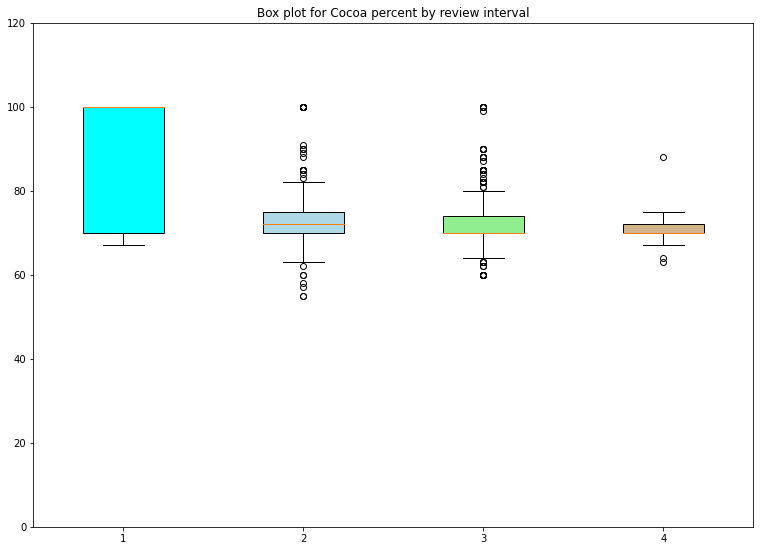

In [32]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])
box = ax.boxplot(plotdata, patch_artist=True)
plt.ylim((0,120))
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# plt.xticks([1,2,3,4], label = ['1-2','2-3','3-4','4-5'])
plt.title('Box plot for Cocoa percent by review interval')
plt.show()